In [37]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

PATH = '../data/'
file_name = 'third_data.xlsx'

In [54]:
# 진단일자는 전처리를 위해 넣어준다.
init_columns = ['연구등록번호','Diagnosis','진단일자','Gender','진단시점나이','CMV IgM[Serum]','CMV IgG[Serum]',
'HSV IgM[Serum]','HSV IgG[Serum]','VZV IgM[Serum]','VZV IgG[Serum]','WBC COUNT[Whole blood]','Lymphocyte(#)[Whole blood]',
'Lymphocyte(%)[Whole blood]','Monocyte(#)[Whole blood]','Monocyte(%)[Whole blood]','Neutrophil(#)[Whole blood]',
'Neutrophil(%)[Whole blood]','ESR[Whole blood]','CRP[Serum]']

feature_column = ['Diagnosis','CMV IgM[Serum]','CMV IgG[Serum]',
'HSV IgM[Serum]','HSV IgG[Serum]','VZV IgM[Serum]','VZV IgG[Serum]','WBC COUNT[Whole blood]','Lymphocyte(#)[Whole blood]',
'Lymphocyte(%)[Whole blood]','Monocyte(#)[Whole blood]','Monocyte(%)[Whole blood]','Neutrophil(#)[Whole blood]',
'Neutrophil(%)[Whole blood]','ESR[Whole blood]','CRP[Serum]']

In [41]:
# Read data
df = pd.read_excel(PATH + file_name)

# Total number
print(df.shape)

# Info
print(df.info())

# Count Diagnosis 0,1,2 
print(df['Diagnosis'].value_counts())

(9204, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9204 entries, 0 to 9203
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   연구등록번호                      9204 non-null   int64  
 1   Diagnosis                   9204 non-null   int64  
 2   진단일자                        9204 non-null   object 
 3   Gender                      9204 non-null   int64  
 4   진단시점나이                      9204 non-null   int64  
 5   CMV IgM[Serum]              858 non-null    float64
 6   CMV IgG[Serum]              831 non-null    float64
 7   HSV IgM[Serum]              885 non-null    float64
 8   HSV IgG[Serum]              0 non-null      float64
 9   VZV IgM[Serum]              768 non-null    float64
 10  VZV IgG[Serum]              769 non-null    float64
 11  WBC COUNT[Whole blood]      8997 non-null   float64
 12  Lymphocyte(#)[Whole blood]  9006 non-null   float64
 13  Lymphocyte(%)[Whole bl

In [42]:
# change 'VZV IgM[Serum]' and 'Monocyte(#)[Whole blood]' and 'Neutrophil(#)[Whole blood]' into float64
df[['VZV IgM[Serum]','Monocyte(#)[Whole blood]','Neutrophil(#)[Whole blood]']] = df[['VZV IgM[Serum]','Monocyte(#)[Whole blood]','Neutrophil(#)[Whole blood]']].astype(float)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9204 entries, 0 to 9203
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   연구등록번호                      9204 non-null   int64  
 1   Diagnosis                   9204 non-null   int64  
 2   진단일자                        9204 non-null   object 
 3   Gender                      9204 non-null   int64  
 4   진단시점나이                      9204 non-null   int64  
 5   CMV IgM[Serum]              858 non-null    float64
 6   CMV IgG[Serum]              831 non-null    float64
 7   HSV IgM[Serum]              885 non-null    float64
 8   HSV IgG[Serum]              0 non-null      float64
 9   VZV IgM[Serum]              768 non-null    float64
 10  VZV IgG[Serum]              769 non-null    float64
 11  WBC COUNT[Whole blood]      8997 non-null   float64
 12  Lymphocyte(#)[Whole blood]  9006 non-null   float64
 13  Lymphocyte(%)[Whole blood]  9006 

## 연구등록번호 기준 결측치 처리

In [43]:
# group by '연구등록번호' and 'Diagnosis'
df_group = df.groupby(['연구등록번호'])
print(len(df_group.groups))


2876


In [44]:
df_fill_group = df_group.apply(lambda x: x.fillna(x.mean()))

/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [45]:
df_fill_group.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9204 entries, (104150, 0) to (10719371, 9203)
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   연구등록번호                      9204 non-null   int64  
 1   Diagnosis                   9204 non-null   int64  
 2   진단일자                        9204 non-null   object 
 3   Gender                      9204 non-null   int64  
 4   진단시점나이                      9204 non-null   int64  
 5   CMV IgM[Serum]              1972 non-null   float64
 6   CMV IgG[Serum]              1926 non-null   float64
 7   HSV IgM[Serum]              2177 non-null   float64
 8   HSV IgG[Serum]              0 non-null      float64
 9   VZV IgM[Serum]              1816 non-null   float64
 10  VZV IgG[Serum]              1933 non-null   float64
 11  WBC COUNT[Whole blood]      9116 non-null   float64
 12  Lymphocyte(#)[Whole blood]  9101 non-null   float64
 13  Lymphocyte(

In [46]:
# df 에 df_fill_group 적용하기
df = df_fill_group
df.to_excel(PATH + 'third_data_fill.xlsx')

In [47]:
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9204 entries, (104150, 0) to (10719371, 9203)
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   연구등록번호                      9204 non-null   int64  
 1   Diagnosis                   9204 non-null   int64  
 2   진단일자                        9204 non-null   object 
 3   Gender                      9204 non-null   int64  
 4   진단시점나이                      9204 non-null   int64  
 5   CMV IgM[Serum]              1972 non-null   float64
 6   CMV IgG[Serum]              1926 non-null   float64
 7   HSV IgM[Serum]              2177 non-null   float64
 8   HSV IgG[Serum]              0 non-null      float64
 9   VZV IgM[Serum]              1816 non-null   float64
 10  VZV IgG[Serum]              1933 non-null   float64
 11  WBC COUNT[Whole blood]      9116 non-null   float64
 12  Lymphocyte(#)[Whole blood]  9101 non-null   float64
 13  Lymphocyte(

## Diagnosis 기준 결측치 처리

In [48]:
df_group = df.groupby('Diagnosis')
print(len(df_group.groups))

3


In [49]:
# 각 Group 마다 mean, median, std, min, max 계산
df_group_mean = df_group.mean()
df_group_median = df_group.median()
df_group_std = df_group.std()
df_group_min = df_group.min()
df_group_max = df_group.max()

# Write all into text file
detail_string = '''
--------------------Mean--------------------
{df_group_mean}
--------------------Median--------------------
{df_group_median}
--------------------Std--------------------
{df_group_std}
--------------------Min--------------------
{df_group_min}
--------------------Max--------------------
{df_group_max}
'''

# Write all into text file
write_file = open(PATH + 'third_data_detail.txt', 'w')
write_file.write(detail_string.format(df_group_mean=df_group_mean,
                                        df_group_median=df_group_median,
                                        df_group_std=df_group_std,
                                        df_group_min=df_group_min,
                                        df_group_max=df_group_max))


10880

In [50]:
# median 값으로 채우기
df_fill_group2 = df_group.apply(lambda x: x.fillna(x.median()))

print(df_fill_group2.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9204 entries, (104150, 0) to (10719371, 9203)
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   연구등록번호                      9204 non-null   int64  
 1   Diagnosis                   9204 non-null   int64  
 2   진단일자                        9204 non-null   object 
 3   Gender                      9204 non-null   int64  
 4   진단시점나이                      9204 non-null   int64  
 5   CMV IgM[Serum]              9204 non-null   float64
 6   CMV IgG[Serum]              9204 non-null   float64
 7   HSV IgM[Serum]              9204 non-null   float64
 8   HSV IgG[Serum]              0 non-null      float64
 9   VZV IgM[Serum]              9204 non-null   float64
 10  VZV IgG[Serum]              9204 non-null   float64
 11  WBC COUNT[Whole blood]      9204 non-null   float64
 12  Lymphocyte(#)[Whole blood]  9204 non-null   float64
 13  Lymphocyte(

/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [51]:
df = df_fill_group2
df.to_excel(PATH + 'fourth_data.xlsx')

## 결측치 분석

/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.draw()
/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.draw()
/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.draw()
/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  fig.canvas.draw()
/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/seaborn/utils.py:95: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.draw()
/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python

<AxesSubplot:ylabel='연구등록번호-None'>

/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kwontaeyoon/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarn

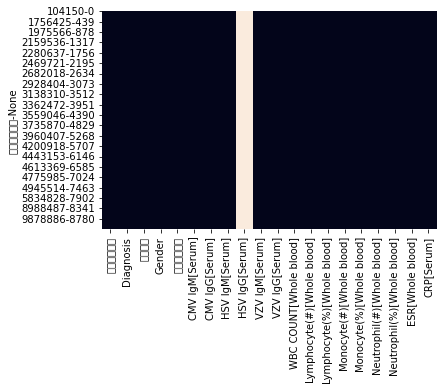

In [52]:
# 시각화
sns.heatmap(df.isnull(), cbar=False)

In [53]:
# 결측치 확인
print(df.isnull().sum())

연구등록번호                           0
Diagnosis                        0
진단일자                             0
Gender                           0
진단시점나이                           0
CMV IgM[Serum]                   0
CMV IgG[Serum]                   0
HSV IgM[Serum]                   0
HSV IgG[Serum]                9204
VZV IgM[Serum]                   0
VZV IgG[Serum]                   0
WBC COUNT[Whole blood]           0
Lymphocyte(#)[Whole blood]       0
Lymphocyte(%)[Whole blood]       0
Monocyte(#)[Whole blood]         0
Monocyte(%)[Whole blood]         0
Neutrophil(#)[Whole blood]       0
Neutrophil(%)[Whole blood]       0
ESR[Whole blood]                 0
CRP[Serum]                       0
dtype: int64


In [55]:
final_column = ['Diagnosis','Gender','진단시점나이','CMV IgM[Serum]','CMV IgG[Serum]',
'HSV IgM[Serum]','VZV IgM[Serum]','VZV IgG[Serum]','WBC COUNT[Whole blood]','Lymphocyte(#)[Whole blood]',
'Lymphocyte(%)[Whole blood]','Monocyte(#)[Whole blood]','Monocyte(%)[Whole blood]','Neutrophil(#)[Whole blood]',
'Neutrophil(%)[Whole blood]','ESR[Whole blood]','CRP[Serum]']

df_final = df[final_column]

In [56]:
print(df_final.info())
df_final.to_excel(PATH + 'final_data.xlsx')



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9204 entries, (104150, 0) to (10719371, 9203)
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Diagnosis                   9204 non-null   int64  
 1   Gender                      9204 non-null   int64  
 2   진단시점나이                      9204 non-null   int64  
 3   CMV IgM[Serum]              9204 non-null   float64
 4   CMV IgG[Serum]              9204 non-null   float64
 5   HSV IgM[Serum]              9204 non-null   float64
 6   VZV IgM[Serum]              9204 non-null   float64
 7   VZV IgG[Serum]              9204 non-null   float64
 8   WBC COUNT[Whole blood]      9204 non-null   float64
 9   Lymphocyte(#)[Whole blood]  9204 non-null   float64
 10  Lymphocyte(%)[Whole blood]  9204 non-null   float64
 11  Monocyte(#)[Whole blood]    9204 non-null   float64
 12  Monocyte(%)[Whole blood]    9204 non-null   float64
 13  Neutrophil(

In [58]:
# final data mean, median, std, min, max 저장
df_final_mean = df_final.mean()
df_final_median = df_final.median()
df_final_std = df_final.std()
df_final_min = df_final.min()
df_final_max = df_final.max()

# Write all into text file
detail_string = '''
--------------------Mean--------------------
{df_final_mean}
--------------------Median--------------------
{df_final_median}
--------------------Std--------------------
{df_final_std}
--------------------Min--------------------
{df_final_min}
--------------------Max--------------------
{df_final_max}
'''
write_file = open(PATH + 'final_data_detail.txt', 'w')
write_file.write(detail_string.format(df_final_mean=df_final_mean,
                                      df_final_median=df_final_median,
                                      df_final_std=df_final_std,
                                      df_final_min=df_final_min,
                                      df_final_max=df_final_max))


3581

## 데이터 표준화

In [59]:
normalization_feature = ['진단시점나이','CMV IgM[Serum]','CMV IgG[Serum]','HSV IgM[Serum]','VZV IgM[Serum]','VZV IgG[Serum]','WBC COUNT[Whole blood]','Lymphocyte(#)[Whole blood]','Lymphocyte(%)[Whole blood]','Monocyte(#)[Whole blood]','Monocyte(%)[Whole blood]','Neutrophil(#)[Whole blood]','Neutrophil(%)[Whole blood]','ESR[Whole blood]','CRP[Serum]']

# normalize features
df_normalize = df_final.copy()

df_normalize[normalization_feature] = df_normalize[normalization_feature].apply(lambda x: (x - x.mean()) / (x.std()))

In [60]:
df_normalize.head()

Diagnosis  Gender    진단시점나이  CMV IgM[Serum]  CMV IgG[Serum]  \
연구등록번호                                                                  
104150 0          0       1  0.523362       -0.129063       -0.141728   
       1          0       1  0.523362       -0.129063       -0.141728   
261562 2          1       0  1.580601        0.824021       -1.561817   
       3          1       0  1.580601        0.824021       -1.561817   
       4          1       0  1.580601        0.824021       -1.561817   

          HSV IgM[Serum]  VZV IgM[Serum]  VZV IgG[Serum]  \
연구등록번호                                                     
104150 0       -0.173926       -0.173158       -0.071609   
       1       -0.173926       -0.173158       -0.071609   
261562 2        0.299113        0.935650       -1.296935   
       3        0.299113        0.935650       -1.296935   
       4        0.299113        0.935650       -1.296935   

          WBC COUNT[Whole blood]  Lymphocyte(#)[Whole blood]  \
연구등록번호                                                         
104150 0                0.232926                   -1.115800   
       1               -0.468530                    0.155528   
261562 2                1.171360                    0.796625   
       3                2.624038                   -0.931077   
       4                1.332506                   -0.159587   

          Lymphocyte(%)[Whole blood]  Monocyte(#)[Whole blood]  \
연구등록번호                                                           
104150 0                   -1.547929                 -0.421460   
       1                    0.836789                 -0.230419   
261562 2                   -0.081070                  0.533746   
       3                   -2.079773                  0.839412   
       4                   -1.367789                  0.724787   

          Monocyte(%)[Whole blood]  Neutrophil(#)[Whole blood]  \
연구등록번호                                                           
104150 0                 -0.726479                    0.938905   
       1                  0.223457                   -0.720708   
261562 2                  0.165885                    1.839619   
       3                 -0.927980                    4.603087   
       4                 -0.553763                    2.230568   

          Neutrophil(%)[Whole blood]  ESR[Whole blood]  CRP[Serum]  
연구등록번호                                                              
104150 0                   -0.063799         -0.007692   -0.211225  
       1                   -0.063799         -0.007692   -0.211225  
261562 2                    0.174120          0.379050    0.538617  
       3                    0.174120          0.379050    0.538617  
       4                    0.174120          0.379050    0.538617

In [61]:
df_normalize.to_excel(PATH + 'final_data_normalize.xlsx')